In [6]:
import numpy as np
import matplotlib.pyplot as plt

data = []
filename = 'zombies_data - Sheet1.csv'

with open(filename, 'r') as f:
    lines = f.readlines()
    for line in lines[1:]:
        if line.strip():
            parts = line.strip().split(',')
            row = [float(parts[0]), float(parts[1]), float(parts[2])]
            data.append(row)

data_matrix = np.array(data)

X_raw = data_matrix[:, :2]
Y = data_matrix[:, 2]

print(f"Loaded {len(Y)} samples.")

Loaded 22 samples.


In [7]:
# Normalization & Helper Functions
mu = np.mean(X_raw, axis=0)
sigma = np.std(X_raw, axis=0)

X_norm = (X_raw - mu) / sigma

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, w, b):
    m = len(y)
    z = np.dot(X, w) + b
    h = sigmoid(z)
    epsilon = 1e-15
    cost = (-1/m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    return cost

In [8]:
# Gradient Descent Implementation
def gradient_descent(X, y, w, b, alpha, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        z = np.dot(X, w) + b
        h = sigmoid(z)

        dw = (1/m) * np.dot(X.T, (h - y))
        db = (1/m) * np.sum(h - y)

        w -= alpha * dw
        b -= alpha * db

        if i % 100 == 0:
            cost_history.append(compute_cost(X, y, w, b))

    return w, b, cost_history

w_init = np.zeros(X_norm.shape[1])
b_init = 0.0
learning_rate = 0.1
iterations = 5000

w_final, b_final, costs = gradient_descent(X_norm, Y, w_init, b_init, learning_rate, iterations)

print(f"Final Weights: {w_final}")
print(f"Final Bias: {b_final}")

Final Weights: [7.86606051 5.6538977 ]
Final Bias: 1.6666161771550203


In [9]:
# Prediction Logic
def predict(speed, ammo):
    input_features = np.array([speed, ammo])
    input_norm = (input_features - mu) / sigma

    z = np.dot(input_norm, w_final) + b_final
    probability = sigmoid(z)

    return probability

runner_speed = 25
runner_ammo = 1

prob = predict(runner_speed, runner_ammo)
prediction = "Survive" if prob >= 0.5 else "Infected"

print(f"Runner (Speed: {runner_speed}, Ammo: {runner_ammo})")
print(f"Survival Probability: {prob:.4f}")
print(f"Prediction: {prediction}")

Runner (Speed: 25, Ammo: 1)
Survival Probability: 1.0000
Prediction: Survive


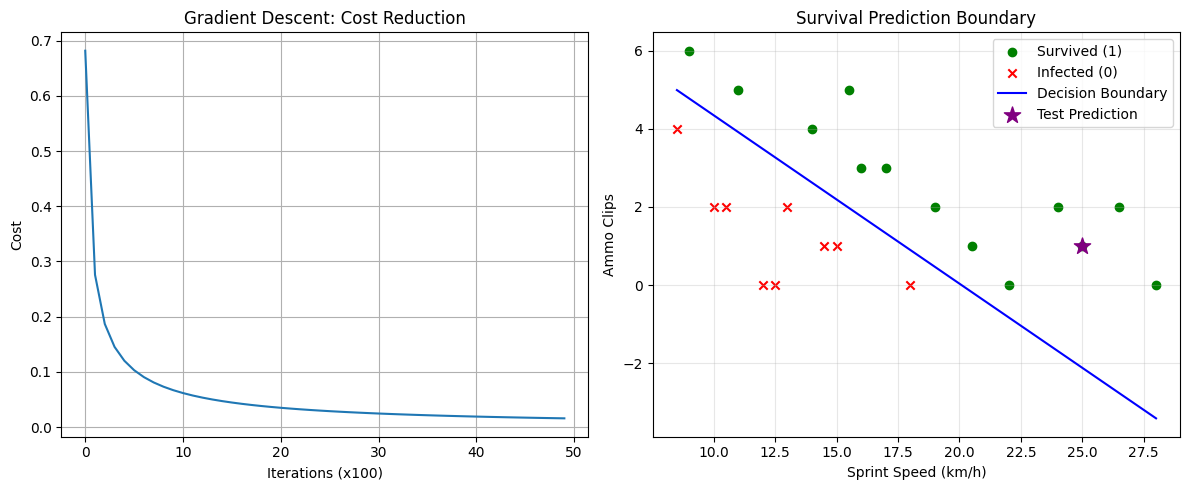

In [10]:
# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(costs)
plt.title('Gradient Descent: Cost Reduction')
plt.xlabel('Iterations (x100)')
plt.ylabel('Cost')
plt.grid(True)

plt.subplot(1, 2, 2)

survived = X_raw[Y == 1]
infected = X_raw[Y == 0]
plt.scatter(survived[:, 0], survived[:, 1], c='green', label='Survived (1)', marker='o')
plt.scatter(infected[:, 0], infected[:, 1], c='red', label='Infected (0)', marker='x')

x1_min, x1_max = X_raw[:, 0].min(), X_raw[:, 0].max()
x_values = np.linspace(x1_min, x1_max, 100)

x_values_norm = (x_values - mu[0]) / sigma[0]

y_values_norm = -(w_final[0] * x_values_norm + b_final) / w_final[1]

y_values = y_values_norm * sigma[1] + mu[1]

plt.plot(x_values, y_values, label='Decision Boundary', color='blue')

plt.scatter([runner_speed], [runner_ammo], c='purple', s=150, marker='*', label='Test Prediction', zorder=5)

plt.xlabel('Sprint Speed (km/h)')
plt.ylabel('Ammo Clips')
plt.legend()
plt.title('Survival Prediction Boundary')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()